In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
# df= pd.read_csv("spam.csv")

In [5]:
df = pd.read_csv("spam.csv", encoding='cp1252')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
# 1. Data Cleaning 
# 2. EDA
# 3. Text Preprocessing 
# 4. Model Building 
# 5. Evaluation
# 6. Improvement 
# 7. Website 
# 8. Deploy 

# 1. Data Cleaning 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop last 3 cols
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace= True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# rename the cols
df.rename(columns= {"v1":"target", "v2":"text"}, inplace=True)

In [ ]:
df.sample(5)

,target,text
3947,ham,I like to think there's always the possibility...
3253,ham,I can make lasagna for you... vodka...
2033,ham,IM GONNA MISS U SO MUCH
2177,ham,Oh k :)why you got job then whats up?
1162,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
df["target"].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
df["target"] = le.fit_transform(df["target"])

In [ ]:
df.sample(5)

,target,text
4981,0,Slept? I thinkThis time ( &lt;#&gt; pm) is no...
1689,0,Bring tat cd don forget
2032,0,"Yes, i'm small kid.. And boost is the secret o..."
5015,0,Hey gals...U all wanna meet 4 dinner at nÌÂte?
127,0,Are you there in room.


In [ ]:
df["target"].unique()

array([0, 1])

In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# duplicate values
df.duplicated().sum()

403

In [ ]:
df.shape

(5572, 2)

In [ ]:
# remove duplicates
df= df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# 2. EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

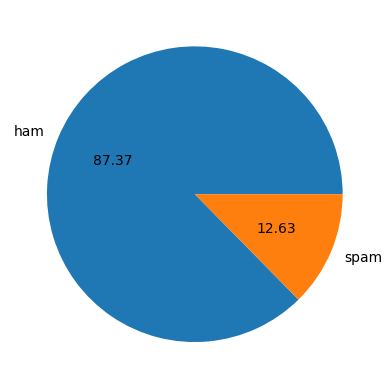

In [ ]:
plt.pie(df["target"].value_counts(), labels=["ham","spam"], autopct= "%0.2f")
plt.show() # here we can see our data is imbalance 

In [ ]:
# !pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Find num of characters
df["num_characters"] = df["text"].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Find num of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Find num of sentences
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham mail check
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam mail check
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

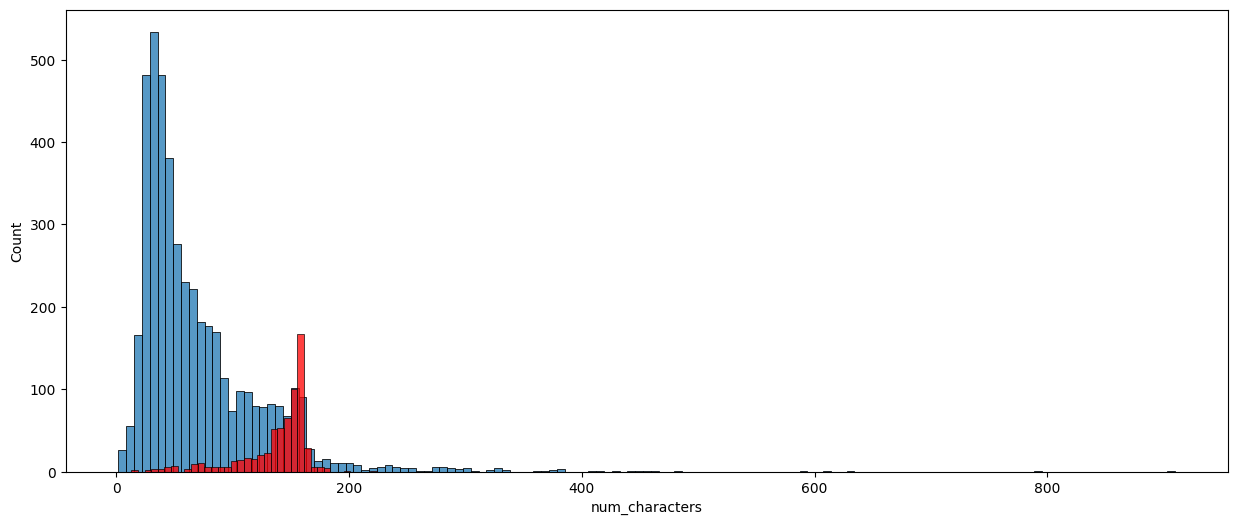

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color="r")

<Axes: xlabel='num_words', ylabel='Count'>

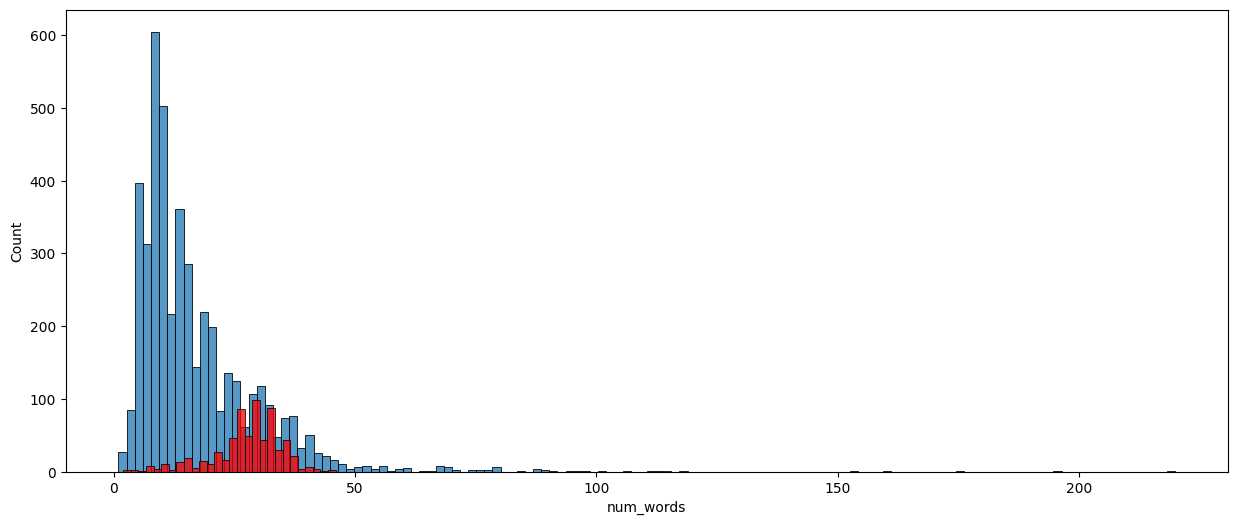

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"], color="r")

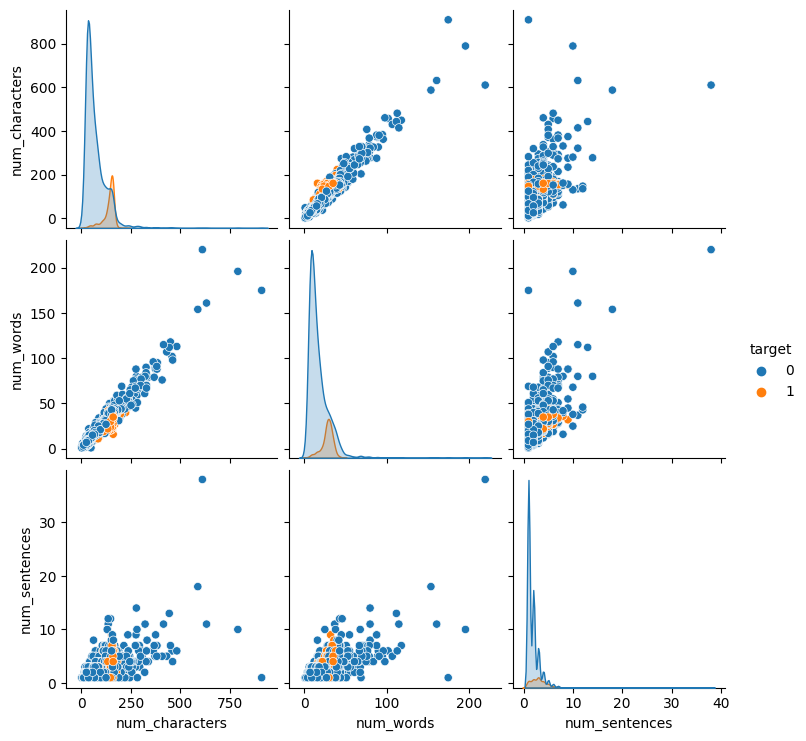

In [ ]:
sns.pairplot(df, hue="target")

In [ ]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

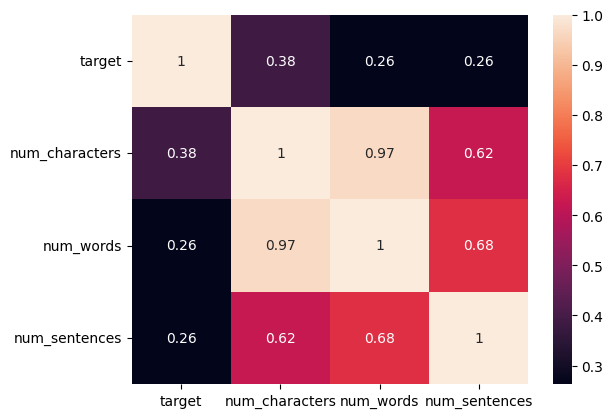

In [ ]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
- Lower case
- Tokenization 
- Removing special characters 
- Removing stop words and punctuation 
- Stemming

In [ ]:
def transform_text(text):
    # Lower case
    text = text.lower()
    return text

In [ ]:
transform_text("Hi How Are You")

'hi how are you'

In [ ]:
df["text"][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [ ]:
transform_text('Even my brother is not like to speak with me. They treat me like aids patent.')

'even my brother is not like to speak with me. they treat me like aids patent.'

In [ ]:
def transform_text(text):
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    return text

In [ ]:
transform_text("Hi How Are You")

['hi', 'how', 'are', 'you']

In [ ]:
df["text"][150]

"The wine is flowing and i'm i have nevering.."

In [ ]:
transform_text("The wine is flowing and i'm i have nevering..")

['the',
 'wine',
 'is',
 'flowing',
 'and',
 'i',
 "'m",
 'i',
 'have',
 'nevering',
 '..']

In [ ]:
def transform_text(text):
    # Lower case
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [ ]:
transform_text("Hi How Are 20% You")

['hi', 'how', 'are', '20', 'you']

In [ ]:
transform_text("The wine is @ flowing and i'm? i have nevering..")

['the', 'wine', 'is', 'flowing', 'and', 'i', 'i', 'have', 'nevering']

In [ ]:
# Removing stop words and punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def transform_text(text):
    # Lower case
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    # Removing stop words and punctuation    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    return y

In [ ]:
transform_text("Did you like my presentation on ML?")

['like', 'presentation', 'ml']

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [ ]:
# Stemming
ps.stem("dancing")

'danc'

In [ ]:
ps.stem('go until juring point, dancing crazy')

'go until juring point, dancing crazi'

In [ ]:
def transform_text(text):
    
    # Lower case
    text = text.lower()
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    # Stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
transform_text('go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df["text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [ ]:
df["transform_text"] = df["text"].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc= WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [ ]:
spamwc = wc.generate(df[df["target"]==1] ["transform_text"].str.cat(sep=" "))

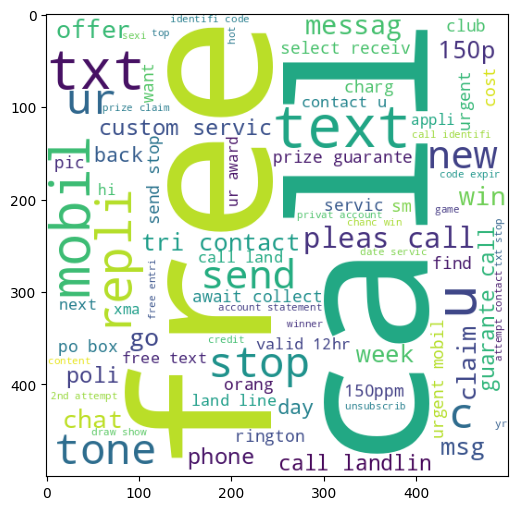

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spamwc)

In [ ]:
hamwc = wc.generate(df[df["target"]==0] ["transform_text"].str.cat(sep=" "))

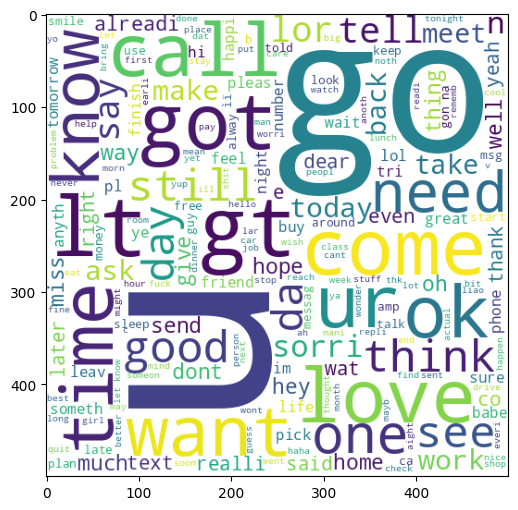

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(hamwc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
df[df["target"]==1]["transform_text"]

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transform_text, Length: 653, dtype: object

In [ ]:
df[df["target"]==1]["transform_text"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [ ]:
spam_corpus = []
for msg in df[df["target"]==1]["transform_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [ ]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation="vertical")
# plt.show()

In [ ]:
ham_corpus = []
for msg in df[df["target"]==0]["transform_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30)))[1])
# plt.xticks(rotation="vertical")
# plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
fvt = TfidfVectorizer(max_features=3000)

In [ ]:
# X = cv.fit_transform(df["transform_text"]).toarray()

X = fvt.fit_transform(df["transform_text"]).toarray() # Another try for better accuracy 

In [ ]:
print(X.shape)

(5169, 3000)


In [ ]:
y = df["target"].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
## fvt -------> MNB Is good precision score and accuracy as well 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc= SVC(kernel= "sigmoid", gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver="liblinear", penalty="l1")
rfc= RandomForestClassifier(n_estimators=  50, random_state=2) 
abc= AdaBoostClassifier(n_estimators= 58, random_state=2)
bc= BaggingClassifier(n_estimators= 50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2) 
xgb= XGBClassifier(n_estinators= 50, random_state=2)

In [ ]:
clfs={
    "SVC" : svc,
    "KN":knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "Bgc": bc,
    "ETC": etc, 
    "GBDT": gbdt,
    "xgb": xgb
}

In [ ]:
def train_classifier(clf, X_train,y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [ ]:
train_classifier(svc, X_train,y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_scores = [] 
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier (clf, X_train,y_train,X_test,y_test)

  print("For :", name)
  print("Accuracy :",current_accuracy)
  print("Precision :", current_precision)

  accuracy_scores.append(current_accuracy) 
  precision_scores.append(current_precision)

For : SVC
Accuracy : 0.9758220502901354
Precision : 0.9747899159663865
For : KN
Accuracy : 0.9052224371373307
Precision : 1.0
For : NB
Accuracy : 0.9709864603481625
Precision : 1.0
For : DT
Accuracy : 0.9294003868471954
Precision : 0.8282828282828283
For : LR
Accuracy : 0.9584139264990329
Precision : 0.9702970297029703
For : RF
Accuracy : 0.9758220502901354
Precision : 0.9829059829059829
For : AdaBoost
Accuracy : 0.9661508704061895
Precision : 0.9557522123893806
For : Bgc
Accuracy : 0.9584139264990329
Precision : 0.8682170542635659
For : ETC
Accuracy : 0.9748549323017408
Precision : 0.9745762711864406
For : GBDT
Accuracy : 0.9468085106382979
Precision : 0.9191919191919192
[17:13:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estinators" } are not used.

For : xgb
Accuracy : 0.971953578336557
Precision : 0.936


In [ ]:
performace_df= pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores}).sort_values("Precision", ascending=False)

In [ ]:
performace_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.966151,0.955752
10,xgb,0.971954,0.936000
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [ ]:
performace_df1 = pd.melt(performace_df, id_vars= "Algorithm")

In [ ]:
performace_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.966151
7,xgb,Accuracy,0.971954
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


In [ ]:
import seaborn as sns

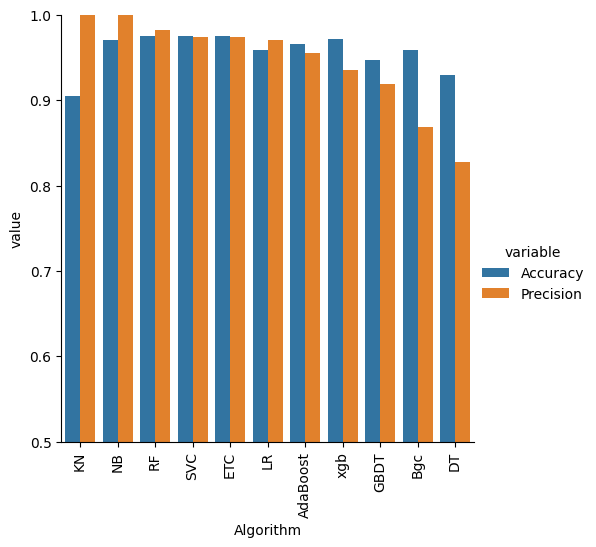

In [ ]:
sns.catplot(x= "Algorithm", y= "value", hue = "variable", data= performace_df1, kind= "bar", height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation= "vertical")
plt.show()

In [ ]:
## Model Improve
# 1. change the max_feature parameter of TfIdf
# That accuracy is good with max_features

In [ ]:
temp_df= pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores, "Precision":precision_scores, "Accuracy_MAX_fit_3000":accuracy_scores, "Precision_MAX_fit_3000":precision_scores}).sort_values("Precision_MAX_fit_3000", ascending=False)

In [ ]:
temp_df

,Algorithm,Accuracy,Precision,Accuracy_MAX_fit_3000,Precision_MAX_fit_3000
1,KN,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000
5,RF,0.975822,0.982906,0.975822,0.982906
0,SVC,0.975822,0.974790,0.975822,0.974790
8,ETC,0.974855,0.974576,0.974855,0.974576
4,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.966151,0.955752,0.966151,0.955752
10,xgb,0.971954,0.936000,0.971954,0.936000
9,GBDT,0.946809,0.919192,0.946809,0.919192
7,Bgc,0.958414,0.868217,0.958414,0.868217


In [ ]:
# Voting Classifier
Svc= SVC(kernel= "sigmoid", gamma=1.0)
mnb= MultinomialNB()
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting= VotingClassifier (estimators=[("sve", svc), ("nb", mnb), ("et", etc)], voting="soft")

In [ ]:
# voting.fit(X_train,y_train)
# y_pred = voting.predict(X_test)
# print("Accuracy", accuracy_scores(y_test,y_pred))
# print("Precision", precision_scores(y_test,y_pred))

In [ ]:
# Applying stocking
estimators= [('svm', svc), ("nb", mnb), ('et', etc)]
final_estimator= RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
clf= StackingClassifier (estimators= estimators, final_estimator= final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print("Accuracy", accuracy_score (y_test,y_pred)) 
print("Precision", precision_score (y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [ ]:
import pickle
pickle.dump(fvt,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

# End